In [1]:
from src import Data, myModel
import matplotlib.pyplot as plt

C:\Users\yuch\Downloads\anaconda3\envs\nz_convnet\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


load X-Y samples from block1, and split into train and test sets

In [6]:
data = Data('./data/block1/')
X_trn, X_tst, Y_trn, Y_tst = data.trn_tst_split(test_rate=0.1, random_seed=42)

MemoryError: 

visualize images and labels

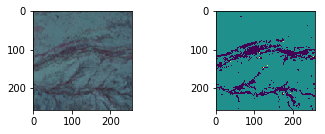

In [3]:
idx = 1
rock_class = 1

img = X_trn[idx,:,:,:]
lbl = Y_trn[idx,:,:,:]

img_rgb = img[:, :, ::-1][:, :, :3]
plt.subplot(221)
plt.imshow(img_rgb)
plt.subplot(222)
plt.imshow(lbl[:,:,rock_class])

start to build and train Conv2D

In [4]:
conv = myModel()

# build Conv2D
conv.build_Conv2D(num_bands=10, n_ch_list=[64,64], use_tfboard=True)

# now the tensorboard event file is saved in ./logs
# the training process, graph and statistics can be
# visualize by tensorboard

# compile with loss and optimizer
conv.compile_model(verbose=True)

# build callback for the details of train process
conv.build_callbackList()

building Conv2D ...
[64, 64]
[64]
compiling model ...
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 10) 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 64) 5824        input_1[0][0]                    
__________________________________________________________________________________________________
alpha_dropout_1 (AlphaDropout)  (None, 256, 256, 64) 0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 256, 256, 64) 36928       alpha_dropout_1[0][0]            
_______________________________________________________

In [5]:
# start to training
conv.fit_model(X_trn=X_trn, Y_trn=Y_trn, epochs=1, verbose=1)

Train on 7 samples, validate on 2 samples
Epoch 1/1
7/7 [==============================] - 12s 2s/step - loss: 2.1419 - acc: 0.2043 - val_loss: 0.4111 - val_acc: 0.9176

Epoch 00001: val_acc improved from -inf to 0.91761, saving model to ./Conv2D/weights-01-0.92.hdf5


predict on test data

In [14]:
# conv.save_weights()
# conv.load_weights('./Conv2D/model-1.hdf5')

In [15]:
Y_preds = conv.predict(X_tst=X_tst)

10/10 [==============================] - 5s 544ms/step


visualize predicted Y

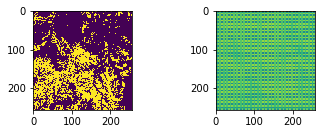

In [36]:
idx = 4
n_class = 5
plt.subplot(221)
plt.imshow(Y_tst[idx,:,:,n_class])
plt.subplot(222)
plt.imshow(Y_preds[idx,:,:,n_class])